# **Healthcare Cardiovascular Disease (CVD) Project:**

![](https://cdnl.iconscout.com/lottie/premium/thumb/doctor-checking-up-patient-5139513-4295179.gif)

## **1. Description**

Medical Examination Dataset Summary
  This dataset includes health records of individuals, capturing key attributes for analyzing cardiovascular disease (CVD) risk and other health conditions.

### **Key Features:**


<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: skyblue;
            border-color:rgb(100, 61, 207);
            font-size: 50%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>   <H3>📌<b>ID:</b> - Unique identifier for each patient</H3>
      <H3> <b>1- Demographics:</b> <H3>
         📌 <B>Age:</B> - Age of the patient (in Days).<br>
         📌 <b>Gender:</b> - Gender of the patient (1: Female, 2: Male).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 2- Anthropometric Data:</b> <H3>
         📌 <b>Height:</b> - Height of the patient (cm).<br>
         📌 <b>weight:</b> - Weight of the patient (kg).<br>
         📌 <b>BMI:</b> - BMI of the patient (calculated).<br>
<p style="padding: 7px; color: Black;">
      <H3> <b>3- Blood Pressure:</b> <H3>
          📌 <b>ap_hi:</b> - Systolic of the patient (ap_hi).<br>
          📌 <b>ap_lo:</b> - Diastolic of the patient (ap_lo).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 4- Health Indicators:</b> <H3>
          📌 <b>cholesterol:</b> - Cholesterol of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>gluc:</b> - glucose of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>smoke:</b> - smoking of the patient (0: Non-smoker, 1: Smoker).<br>
          📌 <b>alco:</b> - alcohol of the patient (0: Non-alcoholic, 1: Alcoholic).<br>
          📌 <b>active:</b> - physical activity of the patient (0: Non-active, 1: Active).<br>
<p style="padding: 7px; color: Black;">
     <H3> <b>5- Target Variable:</b> <H3>
          📌 <b>Cardio:</b> - Cardiovascular disease of the patient (1: Present, 0: Absent).<br>
<br>
    <p style = "padding: 3px; color: Black;">

### **Dataset Overview**

*1*- Size: (13*70000) Thousands of individual records.

2- Type: Mixed numeric and categorical data.

3- Challenges: Includes outliers and categorical data requiring cleaning and preprocessing.

##**2. Data Preprocessing**

### **2.1 Used liberaties**

In [181]:
# Standard Library
! pip install dash
! pip install mlflow
! pip install catboost
import os
import pickle
import warnings
import time

# Third-Party Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import Dash, html, dcc
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.lightgbm
import mlflow.catboost

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics and Statistics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
from scipy.stats import gaussian_kde, pointbiserialr, chi2_contingency
from scipy import stats


###**2.2 Read CSV file (RAW Data)**

In [184]:
#Used Functions
def DescribeFunc(df):
    print("First 5 rows of the dataset:\n", df.head(), "\n")
    print("Last 5 rows of the dataset:\n", df.tail(), "\n")
    print("Dataset Info:")
    df.info()
    print("\nStatistical Description:\n", df.describe())
    print("\nShape of Healthcare dataset --->", df.shape)
    print("Check Duplication in the dataset --->", df.duplicated().sum())
    print("Check Nulls in the dataset --->\n", df.isnull().sum())

def AgeConv(df,col_name):
  df[col_name]=df[col_name]/365
  df[col_name]=df[col_name].astype('int64')
  return df

def visualization(df, max_cols=3):
    # Generate a default color palette (can expand as needed)
    base_colors = ["blue", "lightcoral", "lightgreen", "yellow", "#7B68EE"]
    colors = (base_colors * ((len(df.columns) // len(base_colors)) + 1))[:len(df.columns)]

    total_cols = len(df.columns)
    total_rows = (total_cols + max_cols - 1) // max_cols  # Ceiling division

    fig1 = make_subplots(
        rows=total_rows, cols=max_cols,
        subplot_titles=[f'Distribution of {col}' for col in df.columns]
    )

    for i, column in enumerate(df.columns):
        row = (i // max_cols) + 1
        col = (i % max_cols) + 1
        fig1.add_trace(
            go.Histogram(
                x=df[column],
                nbinsx=30,
                marker=dict(
                    color=colors[i],
                    line=dict(color='black', width=2)
                ),
                name=column
            ),
            row=row, col=col
        )
        fig1.update_xaxes(title_text=column, row=row, col=col)
        fig1.update_yaxes(title_text="Count", row=row, col=col)

    fig1.update_layout(
        showlegend=False,
        title_text="Feature Distributions",
        title_font_size=20,
        width=400 * max_cols,
        height=300 * total_rows,
        margin=dict(t=50, b=50, l=50, r=50)
    )

    fig1.show()

    fig2 = make_subplots(
        rows=total_rows, cols=max_cols,
        subplot_titles=[f'Box Plot of {col}' for col in df.columns]
    )

    for i, column in enumerate(df.columns):
        row = (i // max_cols) + 1
        col = (i % max_cols) + 1
        fig2.add_trace(
                go.Box(
            y=df[column],
            name=column,
            marker_color=colors[i]  # Set box color
        ),
        row=row, col=col
        )
        fig2.update_xaxes(title_text=column, row=row, col=col)
        fig2.update_yaxes(title_text="Count", row=row, col=col)

    fig2.update_layout(
        showlegend=False,
        title_text="Features BoxPlots",
        title_font_size=20,
        width=400 * max_cols,
        height=300 * total_rows,
        margin=dict(t=50, b=50, l=50, r=50)
    )

    fig2.show()


# Add BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 1
    elif bmi < 24.9:
        return 2
    elif bmi < 29.9:
        return 3
    else:
        return 4



def Trials(models,X_train,y_train,X_temp,y_temp):
    mlflow.set_tracking_uri("http://127.0.0.1:5000")
    # Enable MLflow autologging for all supported models
    mlflow.sklearn.autolog()
    mlflow.xgboost.autolog()
    mlflow.lightgbm.autolog()
    #mlflow.catboost.autolog()

    # Step 2: Detect categorical columns for CatBoost (if using CatBoost)
    cat_features = X_train.select_dtypes(include='category').columns.tolist()
    print("cat_features: ", cat_features)

    # Step 4: Train, test, and store results
    results = []
    for name, model in models.items():
        try:
            if mlflow.active_run():
                print("There is an active run. Ending the current run before starting a new one.")
                mlflow.end_run()
            with mlflow.start_run(run_name=f"{name}_Trial1_AllFeaturesExist"):
                print(f"Starting MLflow run for: {name}")
                mlflow.log_param("model_name", name)

                if name == 'XGBoost':
                    X_train[cat_features] = X_train[cat_features].apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
                    X_temp[cat_features] = X_temp[cat_features].apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
                    model.fit(X_train, y_train)
                elif name == 'CatBoost':
                    model.fit(X_train, y_train, cat_features=cat_features)
                elif name == 'LightGBM':
                    model.fit(X_train, y_train, categorical_feature=cat_features)
                else:
                    model.fit(X_train, y_train)

                y_pred_train = model.predict(X_train)
                y_pred_test = model.predict(X_temp)

                train_acc = accuracy_score(y_train, y_pred_train)
                test_acc = accuracy_score(y_temp, y_pred_test)
                train_precision = precision_score(y_train, y_pred_train, average='binary', pos_label=1)
                test_precision = precision_score(y_temp, y_pred_test, average='binary', pos_label=1)
                train_recall = recall_score(y_train, y_pred_train, average='binary', pos_label=1)
                test_recall = recall_score(y_temp, y_pred_test, average='binary', pos_label=1)
                train_f1 = f1_score(y_train, y_pred_train, average='binary', pos_label=1)
                test_f1 = f1_score(y_temp, y_pred_test, average='binary', pos_label=1)

                results.append({
                    'Model': name,
                    'Train Accuracy': round(train_acc, 4),
                    'Test Accuracy': round(test_acc, 4),
                    'Train Precision': round(train_precision, 4),
                    'Test Precision': round(test_precision, 4),
                    'Train Recall': round(train_recall, 4),
                    'Test Recall': round(test_recall, 4),
                    'Train F1': round(train_f1, 4),
                    'Test F1': round(test_f1, 4)
                      })

        except Exception as e:
            print(f"⚠️ Model '{name}' failed with error: {str(e)}")
            mlflow.log_param("error_message", str(e))
            mlflow.log_param("model_name", name)

    # Step 5: Create DataFrame with results
    results_df = pd.DataFrame(results)
    print("\n🔍 Model Comparison:")
    print(results_df)
    return results_df

In [76]:
HealthcareURL = "https://raw.githubusercontent.com/EsraaMohamed-99/my-DataSet/main/medical_examination.csv"
Healthcare = pd.read_csv(HealthcareURL, on_bad_lines='skip')
Healthcare.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###**2.3 Dataset Statistics**

In [77]:
DescribeFunc(Healthcare)

First 5 rows of the dataset:
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0   

Last 5 rows of the dataset:
           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90     

### **2.4 Data Handling:**




####**2.4.1 Converting Human age from days to years**

In [117]:
#Features Thresholds:
#Height
Height_UpperThr=200
Height_LowerThr=100

#Weight
Weight_UpperThr=190
Weight_LowerThr=45

#ap_hi:
ap_hi_UpperThr=250
ap_hi_LowerThr=50

#ap_lo:
ap_lo_UpperThr=150
ap_lo_LowerThr=40

#Hypertension:
Hypertension_UppThr=130
Hypertension_LowerThr=90

In [79]:
Healthcare_Cleaned=Healthcare.copy()
AgeColumn='age'
Healthcare_Cleaned=AgeConv(Healthcare_Cleaned,AgeColumn)
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [80]:
Healthcare_Cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Show the data distribution**

In [81]:
visualization(Healthcare_Cleaned)

Output hidden; open in https://colab.research.google.com to view.

####**2.4.2 Drop unlogical values from gender column**

In [82]:
GenderColumn='gender'
distinct_values = Healthcare_Cleaned[GenderColumn].value_counts()
print(distinct_values)

Healthcare_Cleaned=Healthcare_Cleaned[Healthcare_Cleaned[GenderColumn]!=3]
distinct_values_AfterHandling = Healthcare_Cleaned[GenderColumn].value_counts()
print(distinct_values_AfterHandling)

gender
1    45522
2    24467
3       11
Name: count, dtype: int64
gender
1    45522
2    24467
Name: count, dtype: int64


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>From the above histogram: Age distribution is a left skewed and needs normalization</b>
</div>



####**2.4.3 Handling the height column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b> condition used neglect samples which height lower than 100 or greater than 200 (Search from Wikipedia)</b>
</div>



In [83]:
FilteredHeight= ((Healthcare_Cleaned['height']>Height_UpperThr) | (Healthcare_Cleaned['height']<Height_LowerThr)).sum()
FilteredHeight

np.int64(31)

In [84]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['height'] > Height_UpperThr) | (Healthcare_Cleaned['height'] < Height_LowerThr)].index)


In [85]:
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


####**2.4.4 Handling the weight column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: neglecting humans whose weight is greater than 190 or less than 45</b>
</div>



In [86]:
FilteredWeight= ((Healthcare_Cleaned['weight']>Weight_UpperThr) | (Healthcare_Cleaned['weight']<Weight_LowerThr)).sum()
FilteredWeight

np.int64(304)

In [87]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['weight'] > Weight_UpperThr) | (Healthcare_Cleaned['weight'] < Weight_LowerThr)].index)

In [88]:
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [89]:
Healthcare_Cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000,69654.000000
mean,49958.038849,52.845321,1.350805,164.445502,74.344762,128.865133,96.698940,1.367373,1.226864,0.088365,0.053881,0.803515,0.500747
std,28854.556667,6.762313,0.477226,7.952530,14.222838,154.334330,188.831336,0.680704,0.572724,0.283828,0.225784,0.397343,0.500003
min,0.000000,29.000000,1.000000,100.000000,45.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24989.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49987.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74880.750000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,200.000000,183.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


####**2.4.5 Handling ap_hi column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the lowest possible value of ap_hi from the below table we found that its value equals to 50 mmHg</b>
</div>



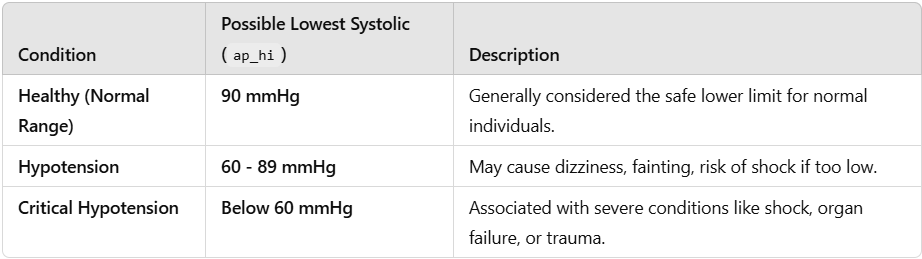

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the highest possible vaue of ap_hi from the below table we will take the upper threshold -->250 mmHg</b>
</div>



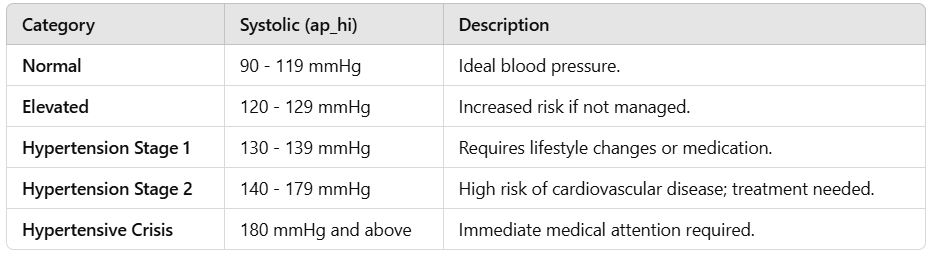

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>These thresholds are chosen based on search taking into consideration (Age[29,64],Weight[45,183], height[100,200])</b>
</div>



In [90]:
Filtered_ap_hi= ((Healthcare_Cleaned['ap_hi']>ap_hi_UpperThr) | (Healthcare_Cleaned['ap_hi']<ap_hi_LowerThr)).sum()
Filtered_ap_hi

np.int64(224)

In [91]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['ap_hi'] > ap_hi_UpperThr) | (Healthcare_Cleaned['ap_hi'] < ap_hi_LowerThr)].index)

In [92]:
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


####**2.4.6 Handling ap_lo column**

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Condition: the upper and lower thresholds of ap_lo. Let's take the upper threshold--> 150 mm Hg and the lowr threshold-->40 mm Hg</b>
</div>



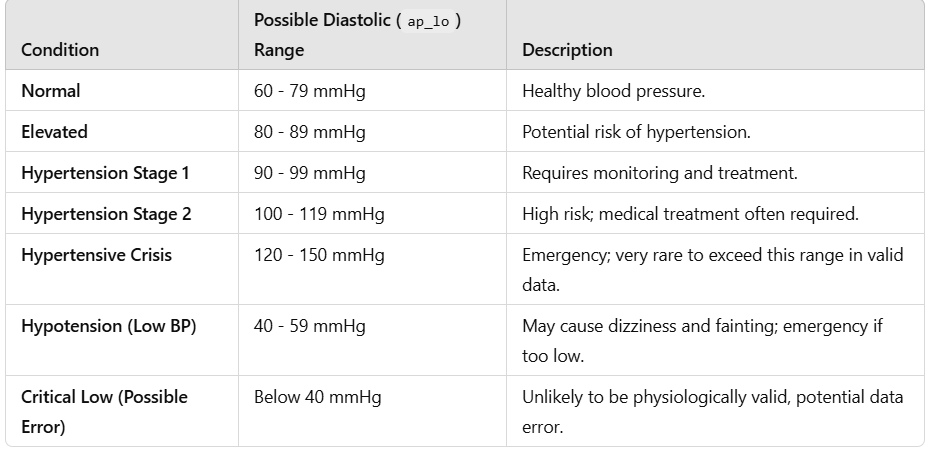

In [93]:
Filtered_ap_lo= ((Healthcare_Cleaned['ap_lo']>ap_lo_UpperThr) | (Healthcare_Cleaned['ap_lo']<ap_lo_LowerThr)).sum()
Filtered_ap_lo

np.int64(1013)

In [94]:
(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>ap_lo_UpperThr) | (Healthcare_Cleaned['ap_lo']<ap_lo_LowerThr)) & (Healthcare_Cleaned['cardio']==1)])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,47,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,60,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,49,1,150,83.0,140,800,1,1,0,0,1,1
329,458,64,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,51,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69631,99454,40,1,154,90.0,130,1000,2,2,0,0,1,1
69771,99659,63,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,59,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,58,2,168,95.0,160,1000,1,1,0,0,1,1


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b> The number of samples in which ap_lo>150 & ap_lo<40 & cardio=1 is 837 samples. </b>
</div>



**Used Criteria**

We assumed that people whose ap_lo>150 and ap_lo<40 should be patients so cardio flag='1' But we wanted to impute ap_lo with logic values so we have determined mean and median of dataframe with conditions
(Healthcare_Cleaned['ap_lo']<150) & (Healthcare_Cleaned['ap_lo']>40) & (Healthcare_Cleaned['cardio']==1) this is the normal case.

In [95]:
#Filter Healthcare_Cleaned with condition cardio==1:
Healthcare_Cleaned_Cardio1=Healthcare_Cleaned[(Healthcare_Cleaned['ap_lo']<ap_lo_UpperThr) & (Healthcare_Cleaned['ap_lo']>ap_lo_LowerThr) & (Healthcare_Cleaned['cardio']==1)]
Healthcare_Cleaned_Cardio1.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.0
mean,50081.886222,54.462133,1.352955,164.323906,76.795529,133.828595,84.619441,1.516722,1.278076,0.083520,0.051699,0.788192,1.0
std,28824.229845,6.354043,0.477896,8.057985,14.746116,17.343563,9.630103,0.776675,0.625285,0.276671,0.221421,0.408596,0.0
min,1.000000,39.000000,1.000000,100.000000,45.000000,70.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,25261.250000,50.000000,1.000000,159.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
50%,50135.500000,55.000000,1.000000,165.000000,75.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
75%,74996.500000,60.000000,2.000000,170.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,99998.000000,64.000000,2.000000,198.000000,183.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.0


In [96]:
# Assuming Healthcare_Cleaned_Cardio1 is your DataFrame
# Healthcare_Cleaned_Cardio1 = pd.read_csv('your_data.csv')  # Example of loading data

# Calculate mean and median
mean_value = Healthcare_Cleaned_Cardio1['ap_lo'].mean()
median_value = Healthcare_Cleaned_Cardio1['ap_lo'].median()

# Create histogram with KDE
fig = go.Figure()

# Add histogram
fig.add_trace(
    go.Histogram(
        x=Healthcare_Cleaned_Cardio1['ap_lo'],
        nbinsx=30,  # Number of bins
        marker_color='skyblue',  # Histogram color
        name='Histogram',
        opacity=0.75,
        histnorm='probability density'  # Normalize for density
    )
)

# Compute KDE
kde = gaussian_kde(Healthcare_Cleaned_Cardio1['ap_lo'].dropna())
x_range = np.linspace(Healthcare_Cleaned_Cardio1['ap_lo'].min(), Healthcare_Cleaned_Cardio1['ap_lo'].max(), 1000)
y_kde = kde(x_range)

# Add KDE as a line plot
fig.add_trace(
    go.Scatter(
        x=x_range,
        y=y_kde,
        mode='lines',
        line=dict(color='orange', width=2),
        name='KDE'
    )
)

# Add mean line
fig.add_trace(
    go.Scatter(
        x=[mean_value, mean_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Mean'
    )
)

# Add median line
fig.add_trace(
    go.Scatter(
        x=[median_value, median_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='green', dash='dash'),
        name='Median'
    )
)

# Update layout
fig.update_layout(
    title='Distribution of ap_lo',
    title_font_size=20,
    xaxis_title='ap_lo',
    yaxis_title='Density',
    legend_title='Legend',
    showlegend=True,
    template='plotly_white'
)

# Show the figure
fig.show()

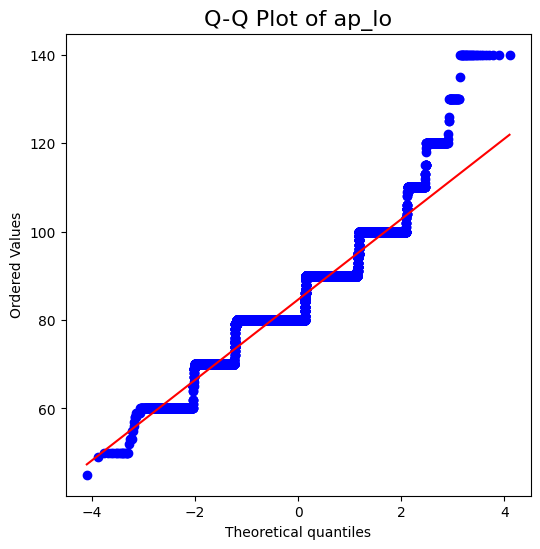

In [97]:
 #Q-Q plot to check for normality
plt.figure(figsize=(6, 6))
stats.probplot(Healthcare_Cleaned_Cardio1['ap_lo'].dropna(), dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {column}', fontsize=16)
plt.show()

In [98]:
#Get the values of mean and median:
print("Mean vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].mean())
print("Median vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].median())

Mean vaue of ap_lo:  84.61944083991979
Median vaue of ap_lo:  80.0


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Samples in Healthcare_Cleaned which ap_lo>150 & ap_hi<40 & cardio=1 impute the value of ap_lo with the mean value.</b>
</div>



In [99]:
mean_ap_lo = int(Healthcare_Cleaned_Cardio1['ap_lo'].mean())

# Apply the imputation based on the specified conditions
Healthcare_Cleaned.loc[((Healthcare_Cleaned['ap_lo'] > ap_lo_UpperThr) | (Healthcare_Cleaned['ap_lo'] < ap_lo_LowerThr)) & (Healthcare_Cleaned['cardio'] == 1),'ap_lo'] = mean_ap_lo


In [101]:
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [103]:
# Verify the changes in the DataFrame
print(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > ap_lo_UpperThr) | (Healthcare_Cleaned['ap_hi'] < ap_lo_LowerThr))& (Healthcare_Cleaned['cardio'] == 1)])

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [104]:
#(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)) & (Healthcare_Cleaned['cardio']==0)])
Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > ap_lo_UpperThr) | (Healthcare_Cleaned['ap_lo'] < ap_lo_LowerThr)) & (Healthcare_Cleaned['cardio'] == 0)].count()

,0
id,176
age,176
gender,176
height,176
weight,176
ap_hi,176
ap_lo,176
cholesterol,176
gluc,176
smoke,176


In [105]:
condition=(((Healthcare_Cleaned['ap_lo'] > ap_lo_UpperThr) | (Healthcare_Cleaned['ap_lo'] < ap_lo_LowerThr)) & (Healthcare_Cleaned['cardio'] == 0))
Healthcare_Cleaned=Healthcare_Cleaned[~condition]
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [107]:
Healthcare_Cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000,69254.000000
mean,49958.128368,52.846565,1.350579,164.440754,74.341584,127.020562,81.418445,1.367589,1.226904,0.088486,0.053932,0.803578,0.501935
std,28855.901668,6.760867,0.477155,7.952150,14.223690,17.042365,9.486860,0.681026,0.572832,0.284002,0.225885,0.397294,0.500000
min,0.000000,29.000000,1.000000,100.000000,45.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24983.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49982.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74878.750000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,200.000000,183.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**During investigation in the data:
We found that PP has some negative values whcih means that ap_hi< ap_lo which is not logic.**

In [108]:
filtered_data_Bug = Healthcare_Cleaned[Healthcare_Cleaned['ap_hi'] < Healthcare_Cleaned['ap_lo']]
filtered_data_Bug

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,52,1,156,65.0,120,150,2,1,0,0,1,0
636,913,56,2,169,68.0,70,110,1,1,0,0,1,0
2384,3356,64,1,154,102.0,90,150,1,1,0,0,0,1
2990,4214,60,2,182,90.0,80,140,3,3,0,0,1,1
3447,4880,54,2,180,80.0,80,125,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65758,93855,39,1,165,65.0,80,120,1,1,0,0,1,0
66657,95164,53,2,160,81.0,80,120,3,3,1,1,1,1
67421,96271,64,1,153,74.0,80,130,1,1,0,0,1,1
67470,96339,58,2,172,57.0,80,120,1,1,1,0,1,1


As number of samples in which ap_hi < ap_low is around 88 record (0.127%) of the dataset. we decide to drop these columns.

In [109]:
condition2=(Healthcare_Cleaned['ap_hi'] < Healthcare_Cleaned['ap_lo'])
Healthcare_Cleaned=Healthcare_Cleaned[~condition2]
Healthcare_Cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


### **2.5 Data after handling**

**Boxplots of [age,height,weight,ap_hi,ap_lo] after cleaning**

In [112]:
visualization(Healthcare_Cleaned)

Output hidden; open in https://colab.research.google.com to view.

### **Export Cleaned Dataset.**

In [113]:
Healthcare_Cleaned.to_csv('Healthcare_Cleaned_Updated.csv', index=False, encoding='utf-8')
print("Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.")

Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.


## **3. EDA (Exploratory Data Analysis):**

### **3.1 Feature Engineering**

Feature engineering involves creating new columns for analysis:

####**3.1.1 BMI Calculation:**
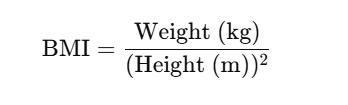

**Convert height from centimeters to meters before calculation.**

#**BMI Categories: Classify BMI values into categories:**
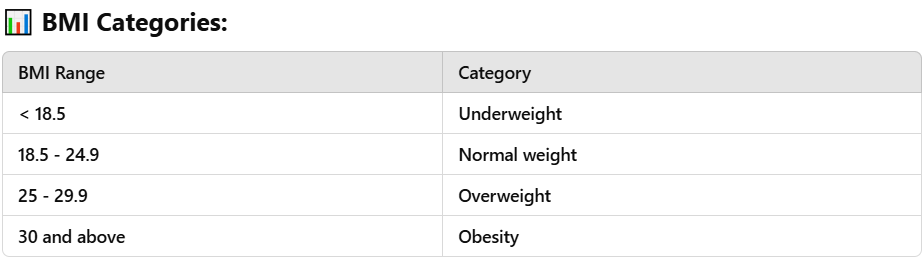



**In our data: Mapping of each category:**

1--> Under weight.

2--> Normal weight.

3--> Overweight.

4--> Obesity.

In [116]:
# Calculate BMI
#Healthcare_Cleaned = Healthcare_Cleaned.copy()
Healthcare_Cleaned.loc[:,'height_m'] = Healthcare_Cleaned['height'] / 100  # Convert height to meters
Healthcare_Cleaned.loc[:,'bmi'] = Healthcare_Cleaned['weight'] / (Healthcare_Cleaned['height_m'] ** 2)  # Calculate BMI
Healthcare_Cleaned.drop(columns=['height_m'], inplace=True)  # Remove temporary column
Healthcare_Cleaned.loc[:,'bmi_category'] = Healthcare_Cleaned['bmi'].apply(bmi_category)
Healthcare_Cleaned.head()

<ipython-input-116-758f639c0f96>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-116-758f639c0f96>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2


####**3.1.2 Hypertension Indicator: Add a flag indicating hypertension based on blood pressure thresholds.**

**Thresholds taken based on the above tables, These thresholds are classified as hypertension stage1:**

ap_hi-->130 mmHg

ap_lo-->90 mmHg

Based on this thresholds Hypertension=1

In [118]:
# Add Hypertension Indicator
Healthcare_Cleaned.loc[:,'hypertension'] = ((Healthcare_Cleaned['ap_hi'] > Hypertension_UppThr) | (Healthcare_Cleaned['ap_lo'] > Hypertension_LowerThr)).astype(int)
Healthcare_Cleaned.head()

<ipython-input-118-687066166d6a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,hypertension
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,3,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2,0


####**3.1.3 Both Pulse Pressure (PP) and Mean Arterial Pressure (MAP) are Features are related to cardiovascular**

In [119]:
# Calculate Mean Arterial Pressure (MAP)
Healthcare_Cleaned.loc[:,'MAP'] = (Healthcare_Cleaned['ap_hi'] + 2 * Healthcare_Cleaned['ap_lo']) / 3

# Calculate Pulse Pressure (PP)
Healthcare_Cleaned.loc[:,'PP'] = Healthcare_Cleaned['ap_hi'] - Healthcare_Cleaned['ap_lo']
# Remove 'cardio' column and store it temporarily
cardio_col = Healthcare_Cleaned.pop('cardio')

# Insert it back at the last position
Healthcare_Cleaned['cardio'] = cardio_col

# Display results
Healthcare_Cleaned

<ipython-input-119-246d86432a4f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-246d86432a4f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-246d86432a4f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_category,hypertension,MAP,PP,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,2,0,90.000000,30,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,4,1,106.666667,50,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805,2,0,90.000000,60,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,3,1,116.666667,50,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177,2,0,73.333333,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,26.927438,3,0,93.333333,40,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,50.472681,4,1,106.666667,50,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,4,1,120.000000,90,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,3,1,98.333333,55,1


### **3.2 Data Visualization**


#### **3.2.1 Vesualize Age-Category & BMI category vs Cardio distribution percentage.**

In [120]:
# Define the pulse pressure categories
#from 0-->30 category 1 --> very low pressure (0-30 mmHg)
#from 30-->60 category 2--> Normal/Low-Normal Pulse Pressure (30-60 mmHg)
#from 60-->90 category 3--> Moderately Elevated Pulse Pressure (60-90 mmHg)
#from 90-->120 category 4--> High Pulse Pressure (90-120 mmHg)
#from 120-->140 category 5--> Very High Pulse Pressure (120-140 mmHg)
bins = [0, 30, 60, 90, 120, 140]  # Adjust these ranges based on your criteria
labels = [1, 2, 3, 4, 5]  # Category labels

# Apply categorization
Healthcare_Cleaned['pp_category'] = pd.cut(Healthcare_Cleaned['PP'], bins=bins, labels=labels, right=True,include_lowest=True)


<ipython-input-120-7f8094deff4b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
# Define the age categories:
#from 20-29 category 1
#from 30-39 category 2
#from 40-49 category 3
#from 50-59 categroy 4
#from 60-69 category 5
#from 70-79 category 6

# Define age brackets
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
Healthcare_Cleaned['age_group'] = pd.cut(Healthcare_Cleaned['age'], bins=bins, labels=labels, right=False)
Healthcare_Cleaned


<ipython-input-121-0cb035ad6cd4>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_category,hypertension,MAP,PP,cardio,pp_category,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,2,0,90.000000,30,0,1,50-59
1,1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,4,1,106.666667,50,1,2,50-59
2,2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805,2,0,90.000000,60,1,2,50-59
3,3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,3,1,116.666667,50,1,2,40-49
4,4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177,2,0,73.333333,40,0,2,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,26.927438,3,0,93.333333,40,0,2,50-59
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,50.472681,4,1,106.666667,50,1,2,60-69
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,4,1,120.000000,90,1,3,50-59
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,3,1,98.333333,55,1,2,60-69


In [122]:
# Load and preprocess data
bmi_age_cardio = Healthcare_Cleaned.groupby(
    ['bmi_category', 'age_group', 'cardio']
).size().reset_index(name='count')
bmi_age_cardio['percentage'] = bmi_age_cardio.groupby(
    ['bmi_category', 'age_group']
)['count'].transform(lambda x: x / x.sum() * 100)
# Generate the plot with TEXT explicitly set to percentage values
fig = px.bar(
     bmi_age_cardio,
    x='age_group',
    y='percentage',
    color='cardio',
    facet_col='bmi_category',
    facet_col_wrap=3,
    title="BMI Categories: Age vs. Cardio (%)",
    labels={'percentage': 'Percentage (%)'},
    color_discrete_map={0: 'blue', 1: 'red'},
    barmode='stack',
    text='percentage'  # Directly use the 'percentage' column for display
)

# Customize text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format to 1 decimal place + add '%'
    textposition='inside',        # Place text inside bars
    insidetextanchor='middle',    # Center text vertically
    textfont_size=10,             # Adjust font size
    cliponaxis=False              # Prevent text from being cut off
)

# Adjust layout
fig.update_layout(
    height=500,
    width=1000,
    uniformtext_minsize=8,       # Minimum text size
    bargap=0.2                   # Add spacing between bars
)

fig.show()

<ipython-input-122-e3f29ae20ddf>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-122-e3f29ae20ddf>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



from tha above figure it is found that the probability that the person suffers from Cardio disease increases with both BMI category increases and age category increases. this matches with logic and real life.

--> if we toke into consideration only age group we found that all graphs the percentage of cardio ='1' increases when the age category increases.

if we toke into our considration BMI category we find that The percentage of cardio='1' increases when BMI_Cateogry increases.

whcih means BMI_Cateogry and age_Category are effective columns on the target column.

#### **3.2.2 vesualize Age-Category & Hypertension vs Cardio distribution percentage.**

In [123]:
# Load and preprocess data
hypertension_age_cardio = Healthcare_Cleaned.groupby(
    ['hypertension', 'age_group', 'cardio']
).size().reset_index(name='count')
hypertension_age_cardio['percentage'] = hypertension_age_cardio.groupby(
    ['hypertension', 'age_group']
)['count'].transform(lambda x: x / x.sum() * 100)
# Generate the plot with TEXT explicitly set to percentage values
fig = px.bar(
    hypertension_age_cardio,
    x='age_group',
    y='percentage',
    color='cardio',
    facet_col='hypertension',
    facet_col_wrap=3,
    title="Hypertension: Age vs. Cardio (%)",
    labels={'percentage': 'Percentage (%)'},
    color_discrete_map={0: 'blue', 1: 'red'},
    barmode='stack',
    text='percentage'  # Directly use the 'percentage' column for display
)

# Customize text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format to 1 decimal place + add '%'
    textposition='inside',        # Place text inside bars
    insidetextanchor='middle',    # Center text vertically
    textfont_size=10,             # Adjust font size
    cliponaxis=False              # Prevent text from being cut off
)

# Adjust layout
fig.update_layout(
    height=500,
    width=1000,
    uniformtext_minsize=8,       # Minimum text size
    uniformtext_mode='hide',     # Hide text if it doesn't fit
    bargap=0.2                   # Add spacing between bars
)

fig.show()

<ipython-input-123-0a537657c822>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-123-0a537657c822>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



From the above figre it is found that the percentage of cardio='1' increases when the person suffers from hypertension and the percentage also correlated to age of the person as if the person suffers from hypertension (hypertension=1) the percentage of cardio='1' increase when the age-group increases.

In [124]:
# Define mapping (adjust ranges/labels as needed)
age_mapping = {
   '20-29':1,
   '30-39':2,
   '40-49':3,
   '50-59':4,
   '60-69':5,
   '70-79':6
}

# Apply mapping
Healthcare_Cleaned['age_group'] = Healthcare_Cleaned['age_group'].map(age_mapping)
Healthcare_Cleaned

<ipython-input-124-448e99b80fb7>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_category,hypertension,MAP,PP,cardio,pp_category,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,2,0,90.000000,30,0,1,4
1,1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,4,1,106.666667,50,1,2,4
2,2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805,2,0,90.000000,60,1,2,4
3,3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,3,1,116.666667,50,1,2,3
4,4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177,2,0,73.333333,40,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,26.927438,3,0,93.333333,40,0,2,4
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,50.472681,4,1,106.666667,50,1,2,5
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,4,1,120.000000,90,1,3,4
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,3,1,98.333333,55,1,2,5


### **3.3 Getting the correlation between categorical features and Cardio target column**

**Based on search found that:**
**to know the relationship between the feature and target column it depends on the type of the data of the column.**

--> if both feature and target columns are numerical we can use pearson correlation.

--> if both feature column and target column are categorical we can use chi2_contingency correlation (p<0.05 indicates to significant feature).

--> if feature column is numerical and traget column is categorical we can use ANOVA , Biserial or Kruskal-Wallis correlation.

From the above notes:
--> chi2_contingency is used to judge the relation between ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category','hypertension'] & target column 'cardio'.

--> ANOVA or Biserial correlation is used to judge the relation between ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'MAP', 'PP'] & The target column.




In [125]:
column_names = Healthcare_Cleaned.columns.tolist()
print(column_names)

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'bmi_category', 'hypertension', 'MAP', 'PP', 'cardio', 'pp_category', 'age_group']


In [126]:
# Define categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                       'active', 'bmi_category', 'hypertension','pp_category','age_group']

# Calculate chi-square p-values and store them in a list
chi2_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(Healthcare_Cleaned[col], Healthcare_Cleaned['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'p-value': p})

# Convert the results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort the DataFrame by p-value in ascending order
chi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(chi2_df)


        Feature        p-value
0   cholesterol   0.000000e+00
1  hypertension   0.000000e+00
2  bmi_category   0.000000e+00
3   pp_category   0.000000e+00
4     age_group   0.000000e+00
5          gluc  2.601954e-127
6        active   3.069004e-21
7         smoke   3.865160e-05
8          alco   4.744033e-02
9        gender   6.143869e-02


* From the above analysis:
it is found that:
Some features are extremly significant on the target column 'Cardio' like ['cholesterol', 'hypertension', ' bmi_Category', 'pp_category', 'age_group', 'glucose' ,'activity']

* Some features have lower effect on the target column but still significant like ['smoke', 'alcohol']

* Gender feature does not affect the target column 'cardio'

### **3.4 Correlation for numerical features we have used Point Biserial:**
Numerical Features are: ['age','height','weight','ap_hi','ap_lo','BMI','MAP','PP'] and Traget column is 'cardio'

  Feature  Correlation (r_pb)   P-value
1  height           -0.015441  0.000049
2  weight            0.180741  0.000000
5     bmi            0.187504  0.000000
0     age            0.238013  0.000000
4   ap_lo            0.340721  0.000000
7      PP            0.345835  0.000000
6     MAP            0.415388  0.000000
3   ap_hi            0.434577  0.000000


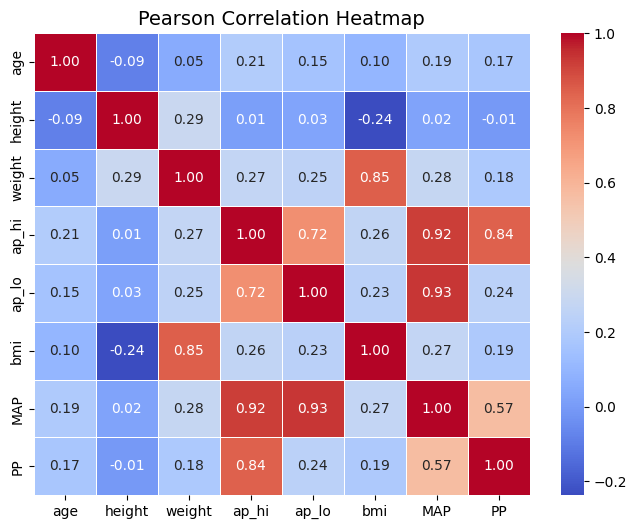

In [127]:
# Calculate Point-Biserial Correlation
NumericalColumns=['age','height','weight','ap_hi','ap_lo','bmi','MAP','PP']
# Initialize an empty list to store results
correlation_results = []
for columnfeature in NumericalColumns:
  r_pb, p_value = pointbiserialr(Healthcare_Cleaned['cardio'], Healthcare_Cleaned[columnfeature])
  correlation_results.append({'Feature': columnfeature, 'Correlation (r_pb)': r_pb, 'P-value': p_value})

# Convert list to DataFrame
correlation_df = pd.DataFrame(correlation_results)
correlation_df=correlation_df.sort_values(by='Correlation (r_pb)',ascending=True)

# Display results
print(correlation_df)

# Compute Pearson correlation matrix
pearson_corr = Healthcare_Cleaned[NumericalColumns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Pearson Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

From Pi-serial correlation it is found that:
* weight and height features have a low correlation with the target column independently when we combine them in BMI feature it has higher correlation.


From the above observations:

there is high correlation between ap_hi & ap_lo which makes sense with the real life.

*  Real-life explanation:
In real life, systolic and diastolic blood pressures are two components of a person's overall blood pressure, and they are measured together. They're influenced by similar biological and lifestyle factors, which naturally causes them to rise and fall together.

There is high correlation between BMI and weight as BMI equation directlr depends on weight.

There is high correlation between MAP and (ap_lo & ap_hi) as the equation directly depends on ap_lo & ap_hi. the same for PP.

during machine learning phase it is required to chck if these columns are redundent features or not and affect the accuracy or not.



In [128]:
# Check NAs per column
na_per_column = Healthcare_Cleaned.isna().sum()
print("NA counts per column:\n", na_per_column)

NA counts per column:
 id              0
age             0
gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
bmi             0
bmi_category    0
hypertension    0
MAP             0
PP              0
cardio          0
pp_category     0
age_group       0
dtype: int64


In [129]:


X = Healthcare_Cleaned[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc', 'smoke',	'alco',	'active',	'bmi',	'bmi_category',	'hypertension',	'MAP',	'PP','age_group']]
y = Healthcare_Cleaned['cardio']

mi_scores = mutual_info_classif(X, y,random_state=15)
# Create a DataFrame with feature names and their respective MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order for better visualization
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(mi_df)

         Feature  MI Score
0          ap_hi  0.119272
1            MAP  0.113949
2   hypertension  0.097854
3             PP  0.079630
4          ap_lo  0.079126
5            age  0.031819
6      age_group  0.025818
7    cholesterol  0.024177
8            bmi  0.024040
9   bmi_category  0.018153
10        weight  0.016805
11          gluc  0.013416
12        gender  0.006271
13        active  0.004911
14         smoke  0.001003
15          alco  0.000483
16        height  0.000000


# **Check the balance of the data**

---



In [130]:

# Create the interactive countplot
fig = px.histogram(
    Healthcare_Cleaned,
    x='cardio',
    color='cardio',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='<b>Distribution of Cardio in Healthcare Data</b>',
    labels={'cardio': 'Cardio (0 = No, 1 = Yes)'}
)

# Calculate percentages
total = len(Healthcare_Cleaned)
percentages = [(count/total)*100 for count in Healthcare_Cleaned['cardio'].value_counts().sort_index()]

# Add percentage labels manually
fig.update_traces(
    text=[f'{p:.1f}%' for p in percentages],
    textposition='outside',
    hovertemplate="<b>Cardio %{x}</b><br>Count: %{y}<br>Percentage: %{text}",
    marker_line_width=1.5,
    marker_line_color='white'
)

# Customize layout
fig.update_layout(
    bargap=0.3,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    title_font=dict(size=18),
    showlegend=False,
    yaxis_title='Count'
)

fig.show()


In [131]:
# Example: suppose df is your DataFrame
rows_with_nan = Healthcare_Cleaned[Healthcare_Cleaned.isna().any(axis=1)]
rows_with_nan

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_category,hypertension,MAP,PP,cardio,pp_category,age_group


In [132]:
# Logistic Regression from scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=5000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_loss = []


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = len(y)
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        loss = -(1/m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss for visualization
            self.train_loss.append(self.compute_loss(X, y))


    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)



In [133]:
X = Healthcare_Cleaned.drop(columns = ['cardio', 'id','gender','height'], axis = 1)
y = Healthcare_Cleaned['cardio']

In [134]:
X

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_category,hypertension,MAP,PP,pp_category,age_group
0,50,62.0,110,80,1,1,0,0,1,21.967120,2,0,90.000000,30,1,4
1,55,85.0,140,90,3,1,0,0,1,34.927679,4,1,106.666667,50,2,4
2,51,64.0,130,70,3,1,0,0,0,23.507805,2,0,90.000000,60,2,4
3,48,82.0,150,100,1,1,0,0,1,28.710479,3,1,116.666667,50,2,3
4,47,56.0,100,60,1,1,0,0,0,23.011177,2,0,73.333333,40,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,76.0,120,80,1,1,1,0,1,26.927438,3,0,93.333333,40,2,4
69996,61,126.0,140,90,2,2,0,0,1,50.472681,4,1,106.666667,50,2,5
69997,52,105.0,180,90,3,1,0,1,0,31.353579,4,1,120.000000,90,3,4
69998,61,72.0,135,80,1,2,0,0,0,27.099251,3,1,98.333333,55,2,5


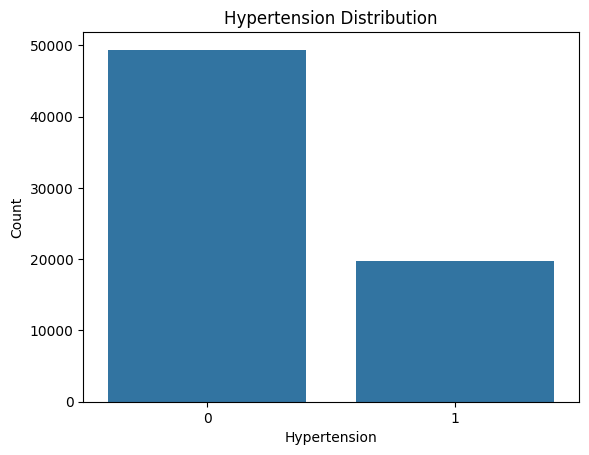

In [135]:
# Basic bar plot
sns.countplot(data=Healthcare_Cleaned, x='hypertension')
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

In [136]:
#Filter on numerical columns before standardization
X_filtered=X[['age','weight','ap_hi','ap_lo','bmi','MAP','PP']]
X_filtered


,age,weight,ap_hi,ap_lo,bmi,MAP,PP
0,50,62.0,110,80,21.967120,90.000000,30
1,55,85.0,140,90,34.927679,106.666667,50
2,51,64.0,130,70,23.507805,90.000000,60
3,48,82.0,150,100,28.710479,116.666667,50
4,47,56.0,100,60,23.011177,73.333333,40
...,...,...,...,...,...,...,...
69995,52,76.0,120,80,26.927438,93.333333,40
69996,61,126.0,140,90,50.472681,106.666667,50
69997,52,105.0,180,90,31.353579,120.000000,90
69998,61,72.0,135,80,27.099251,98.333333,55


In [141]:
categorical_cols = X[['cholesterol','gluc','smoke','alco','active','bmi_category','hypertension','pp_category','age_group']]
categorical_cols = categorical_cols.astype('category')
categorical_cols.dtypes

,cholesterol,gluc,smoke,alco,active,bmi_category,hypertension,pp_category,age_group
0,1,1,0,0,1,2,0,1,4
1,3,1,0,0,1,4,1,2,4
2,3,1,0,0,0,2,0,2,4
3,1,1,0,0,1,3,1,2,3
4,1,1,0,0,0,2,0,2,3
...,...,...,...,...,...,...,...,...,...
69995,1,1,1,0,1,3,0,2,4
69996,2,2,0,0,1,4,1,2,5
69997,3,1,0,1,0,4,1,3,4
69998,1,2,0,0,0,3,1,2,5


In [171]:
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X_filtered)


In [172]:

with open("StandardScaler.pkl", "wb") as f:
    pickle.dump(scaler1, f)

In [173]:
X_scaled

array([[-0.42106752, -0.86745244, -1.00586712, ..., -1.04388149,
        -0.59817953, -1.2968009 ],
       [ 0.31844313,  0.74940139,  0.76120491, ...,  1.3812865 ,
         0.91197763,  0.3538435 ],
       [-0.27316539, -0.72685646,  0.1721809 , ..., -0.75558989,
        -0.59817953,  1.1791657 ],
       ...,
       [-0.12526326,  2.15536124,  3.11730094, ...,  0.71250409,
         2.12010336,  3.65513231],
       [ 1.20585591, -0.16447251,  0.4666929 , ..., -0.08356185,
         0.15689905,  0.7665046 ],
       [ 0.46634526, -0.16447251, -0.41684311, ..., -0.49255856,
        -0.29614809, -0.4714787 ]])

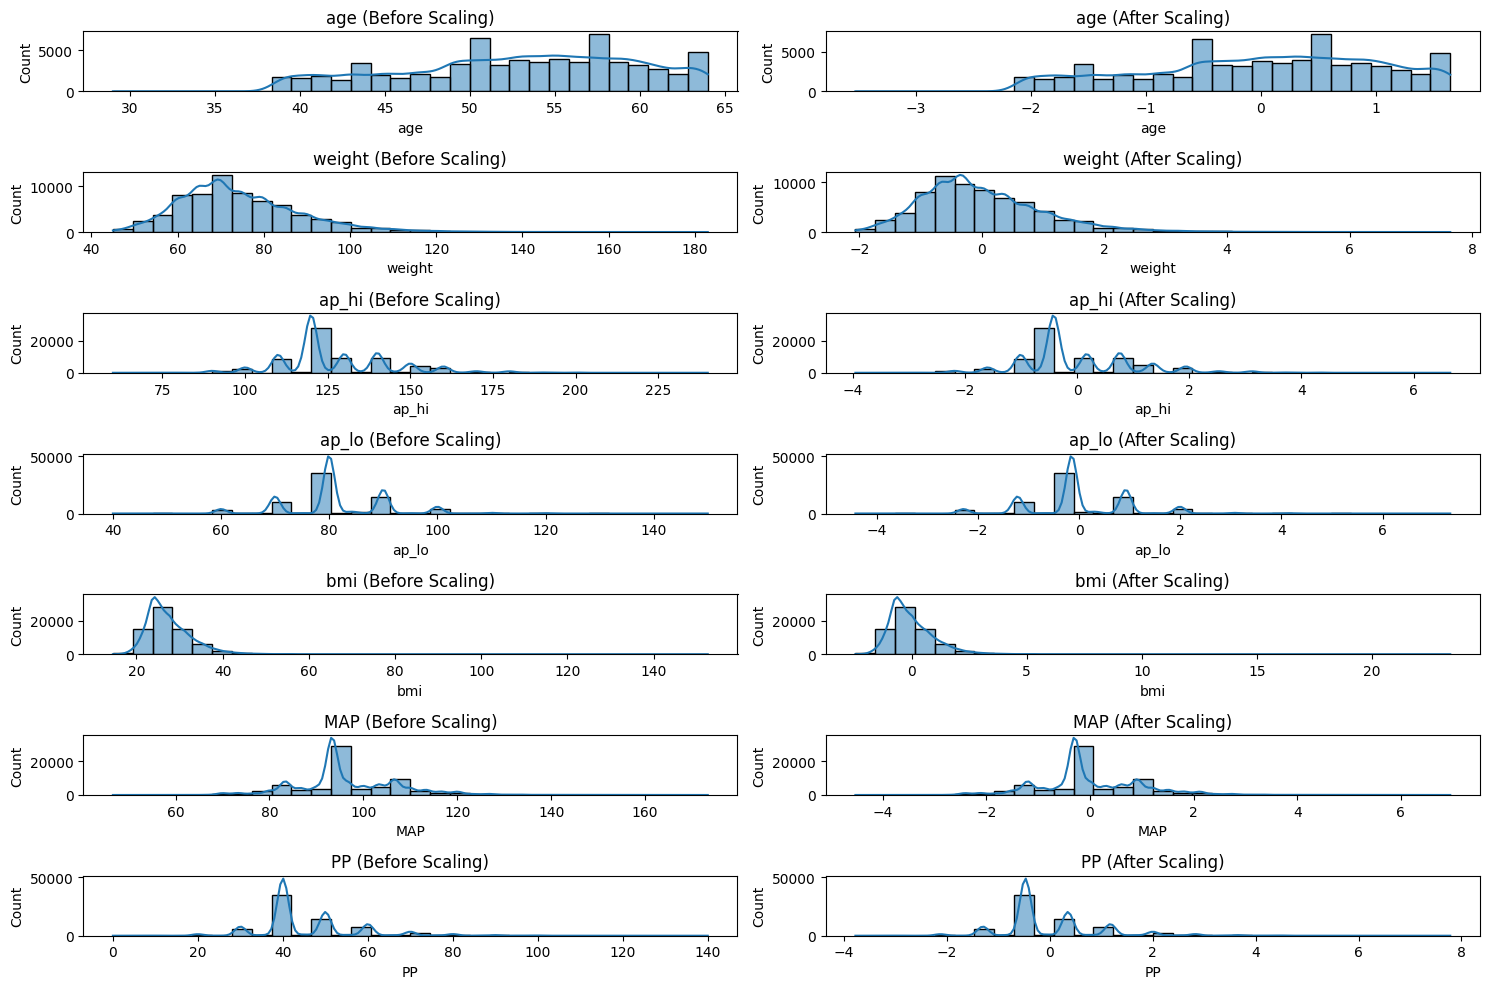

In [174]:
# Convert scaled data to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns)

# Plot histograms before and after scaling
fig, axes = plt.subplots(X_filtered.shape[1], 2, figsize=(15, 10))

for i, col in enumerate(X_filtered.columns):
    # Before scaling
    sns.histplot(X_filtered[col], ax=axes[i, 0], bins=30, kde=True)
    axes[i, 0].set_title(f"{col} (Before Scaling)")

    # After scaling
    sns.histplot(df_scaled[col], ax=axes[i, 1], bins=30, kde=True)
    axes[i, 1].set_title(f"{col} (After Scaling)")

plt.tight_layout()
plt.show()

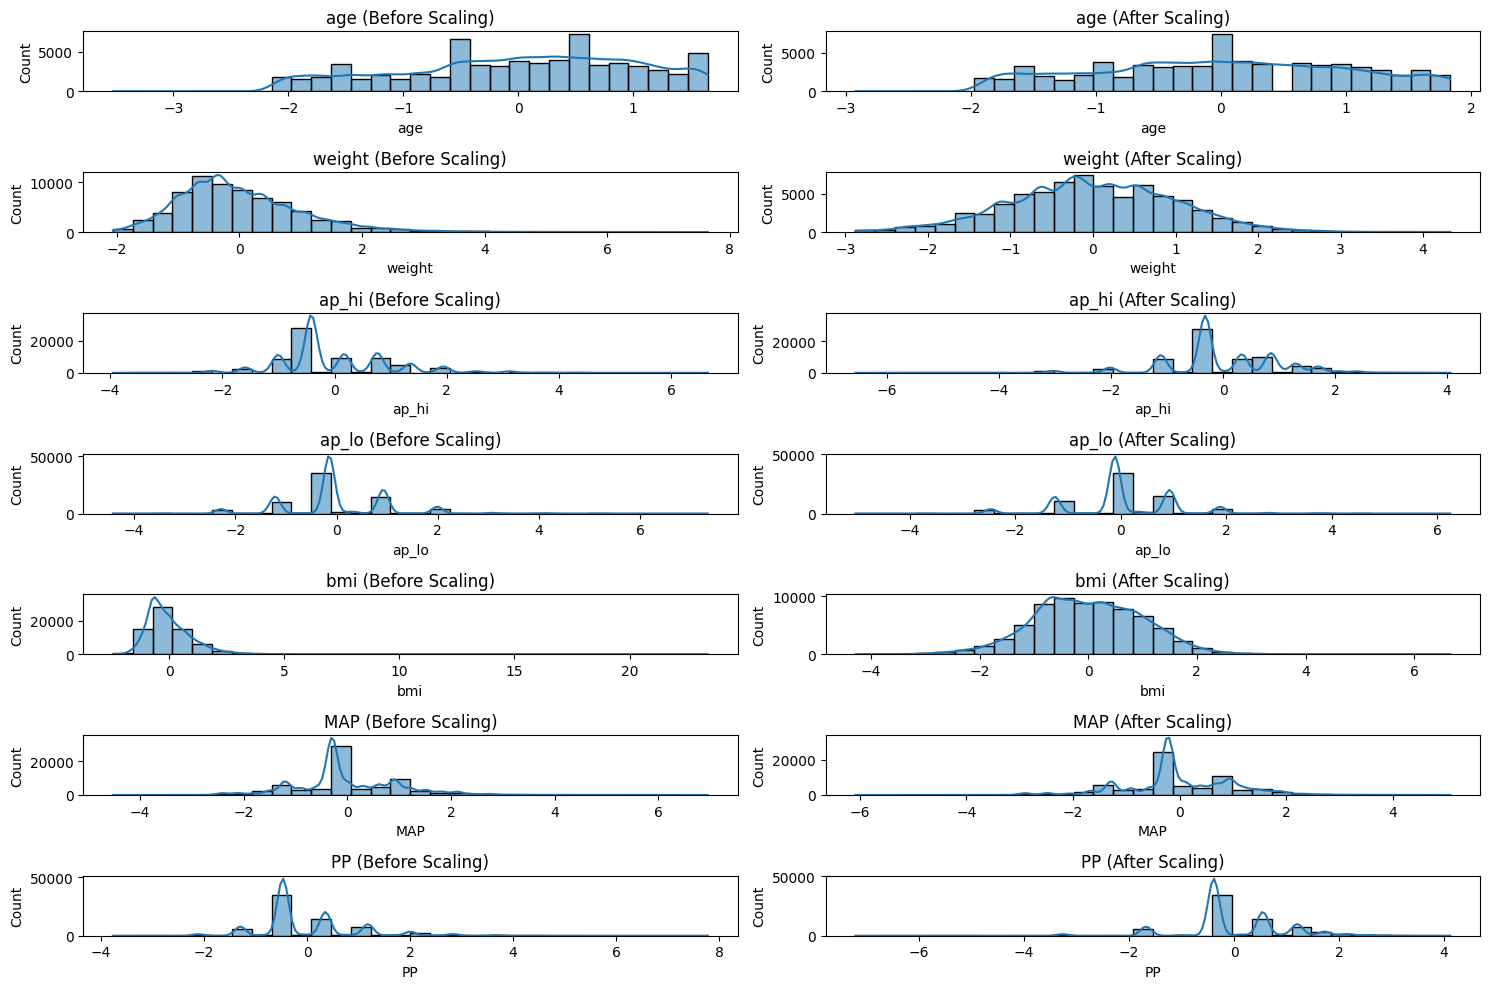

In [175]:

scaler2 = PowerTransformer(method='yeo-johnson')  # Handles both positive & negative values
X_transformed = scaler2.fit_transform(df_scaled)

df_transformed = pd.DataFrame(X_transformed, columns=df_scaled.columns)

# Plot histograms before and after scaling
fig, axes = plt.subplots(X_filtered.shape[1], 2, figsize=(15, 10))

for i, col in enumerate(X_filtered.columns):
    # Before scaling
    sns.histplot(df_scaled[col], ax=axes[i, 0], bins=30, kde=True)
    axes[i, 0].set_title(f"{col} (Before Scaling)")

    # After scaling
    sns.histplot(df_transformed[col], ax=axes[i, 1], bins=30, kde=True)
    axes[i, 1].set_title(f"{col} (After Scaling)")

plt.tight_layout()
plt.show()



In [176]:

with open("PowerTransformation.pkl", "wb") as f:
    pickle.dump(scaler1, f)

In [177]:
x_final= pd.concat([df_transformed, categorical_cols.reset_index(drop=True)], axis=1)
x_final

,age,weight,ap_hi,ap_lo,bmi,MAP,PP,smoke,alco,active,...,pp_category_2,pp_category_3,pp_category_4,pp_category_5,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6
0,-0.496434,-0.919960,-1.110842,-0.106249,-1.293991,-0.560369,-1.679330,0,0,1,...,False,False,False,False,False,False,False,True,False,False
1,0.242977,0.854561,0.854685,0.927890,1.347881,0.935158,0.546811,0,0,1,...,True,False,False,False,False,False,False,True,False,False
2,-0.357816,-0.721934,0.332997,-1.247431,-0.806127,-0.560369,1.204126,0,0,0,...,True,False,False,False,False,False,False,True,False,False
3,-0.763359,0.679557,1.300350,1.889918,0.452763,1.671363,0.546811,0,0,1,...,True,False,False,False,False,False,True,False,False,False
4,-0.892422,-1.557559,-2.018598,-2.461003,-0.958051,-2.477711,-0.387254,0,0,0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69161,-0.215092,0.289992,-0.318956,-0.106249,0.093094,-0.221929,-0.387254,1,0,1,...,True,False,False,False,False,False,False,True,False,False
69162,1.273647,2.630318,0.854685,0.927890,2.719509,0.935158,0.546811,0,0,1,...,True,False,False,False,False,False,False,False,True,False
69163,-0.215092,1.823483,2.392772,0.927890,0.882066,1.902061,2.574213,0,1,0,...,False,True,False,False,False,False,False,True,False,False
69164,1.273647,-0.010868,0.605976,-0.106249,0.131080,0.246717,0.897602,0,0,0,...,True,False,False,False,False,False,False,False,True,False


In [178]:
# Step 1: Split into Train (70%) and Temporary Set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(x_final, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

This part just trying different models all the data features are entered to the models without dropping any feature

In [182]:
# Step 3: Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    #'CatBoost': CatBoostClassifier(verbose=0),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

#This trial is to intial compare between models and how to treat with dataset (contains all features):
results_intial_comparison= Trials(models,X_train,y_train,X_temp,y_temp)
print(results_intial_comparison)


cat_features:  ['smoke', 'alco', 'active', 'hypertension']


2025/04/24 18:44:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7cf9e71f59d0>: Failed to establish a new connection: [Errno 111] Connection refused'))
2025/04/24 18:48:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7cf9e782c4d0>: Failed to establish a new connection: [Errno 111] Connection refused'))
2025/04/24 18:53:20 WARNING mlflow.utils.autolog

⚠️ XGBoost failed with error: 'DataFrame' object has no attribute 'dtype'


⚠️ LightGBM failed with error: Feature (cholesterol_1) appears more than one time.
⚠️ CatBoost failed with error: catboost/libs/data/features_layout.cpp:124: All feature names should be different, but 'cholesterol_1' used more than once.


KeyboardInterrupt: 

From the above observation:
Random forest, XGBoost & CatBoost have the highest score in Test recall
But the best 2 in F1-score are XGBoost & CatBoost in test
Noting that random forest is overfitting
So we will choose between XGBoost & CatBoost

Random forest classifier to know the most impactful features on the target column.

In [185]:
# Step 2: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Get feature importances
feature_importances = rf.feature_importances_

# Step 4: Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5: Select top N features based on importance (for example, top 10)
top_n = 7
selected_features = importance_df.head(top_n)['Feature'].values

2025/04/24 19:22:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7cf9e758c750>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [186]:
selected_features

array(['bmi', 'weight', 'age', 'ap_hi', 'MAP', 'PP', 'hypertension'],
      dtype=object)

In [187]:
importance_df

,Feature,Importance
4,bmi,0.261930
1,weight,0.189267
0,age,0.120460
2,ap_hi,0.087339
5,MAP,0.070148
6,PP,0.040668
10,hypertension,0.036547
3,ap_lo,0.032789
9,active,0.019942
7,smoke,0.012478


In [188]:
# Step 6: Subset the training and testing data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_temp[selected_features]

this part to compare between XGBoost, CatBoost & LightGBM and filtered on the top 7 impactful features.

In [ ]:

Results_OnTop7Features=Trials(models,x_train_selected,y_train,x_test_selected,y_temp)
print(Results_OnTop7Features)



2025/04/24 01:30:47 INFO mlflow.tracking.fluent: Experiment with name 'Logistic Regression_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


✅ Using experiment 'Logistic Regression_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 560528021666709689


2025/04/24 01:31:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/24 01:31:00 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


🏃 View run Logistic Regression_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/560528021666709689/runs/c5465c85a3da45119026dabdbff227d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/560528021666709689
✅ Using experiment 'Random Forest_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 141281352235973980


2025/04/24 01:31:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/24 01:31:36 INFO mlflow.tracking.fluent: Experiment with name 'Gradient Boosting_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


🏃 View run Random Forest_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/141281352235973980/runs/c1c41ee8326649aaa962c0fbefe38979
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/141281352235973980
✅ Using experiment 'Gradient Boosting_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 720614141667220923


2025/04/24 01:31:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/720614141667220923/runs/39c7f9cf1a4045ad9ed9ddfc6cb835fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/720614141667220923


2025/04/24 01:31:53 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


✅ Using experiment 'XGBoost_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 308663921496250996


2025/04/24 01:32:00 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\LAPTOP\AppData\Local\Temp\tmpln_k06l7\model, flavor: xgboost). Fall back to return ['xgboost==2.0.3']. Set logging level to DEBUG to see the full traceback. 
2025/04/24 01:32:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/24 01:32:07 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


🏃 View run XGBoost_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/308663921496250996/runs/e8c0f310839943bb8c574527e8dc3a3a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/308663921496250996
✅ Using experiment 'LightGBM_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 897997971245397217
[LightGBM] [Info] Number of positive: 27767, number of negative: 27565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 55332, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501825 -> initscore=0.007301
[LightGBM] [Info] Start training from score 0.007301


2025/04/24 01:32:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/24 01:32:24 INFO mlflow.tracking.fluent: Experiment with name 'Naive Bayes_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


🏃 View run LightGBM_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/897997971245397217/runs/af5c802778934a42b84234f81da37b9e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/897997971245397217
✅ Using experiment 'Naive Bayes_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 274584984620980796


2025/04/24 01:32:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/04/24 01:32:37 INFO mlflow.tracking.fluent: Experiment with name 'SVM_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


🏃 View run Naive Bayes_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/274584984620980796/runs/24490f6cca3a42e8b576267abf9ee9c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/274584984620980796
✅ Using experiment 'SVM_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 863507704854083831


2025/04/24 01:55:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/863507704854083831/runs/79693aa4c0bd4f83a12fe76efbc09338
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/863507704854083831


2025/04/24 01:55:09 INFO mlflow.tracking.fluent: Experiment with name 'Decision Tree_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' does not exist. Creating a new experiment.


✅ Using experiment 'Decision Tree_Multi_Model_Comparison_AfterSelectingTop7FeaturesBasedOnRandomForestFeatureImportance' with ID: 629828674729118869


2025/04/24 01:55:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree_Trial1_SelectionTop7Features at: http://127.0.0.1:5000/#/experiments/629828674729118869/runs/1c763ce92817471ba23f0964a09677d2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/629828674729118869

🔍 Model Comparison:
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression          0.7298         0.7296           0.7777   
1        Random Forest          0.9571         0.6971           0.9693   
2    Gradient Boosting          0.7380         0.7359           0.7594   
3              XGBoost          0.7605         0.7300           0.7846   
4             LightGBM          0.7458         0.7354           0.7670   
5          Naive Bayes          0.7246         0.7242           0.7965   
6                  SVM          0.7348         0.7348           0.7697   
7        Decision Tree          0.9572         0.6389           0.9875   

   Test Precision  Train Recall  Test Recall  Train F1  Test F1  
0          0.7739 

this part to try voting model between all used models

In [ ]:

# Define the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('nb', GaussianNB()),
    #('svm', SVC(probability=True)),
    #('dt', DecisionTreeClassifier(random_state=42))
], voting='hard')
# Step 3: Define models
Voting_Clf = {
    'voting_clf': voting_clf
}

Result_VotingClf=Trials(Voting_Clf,X_train,y_train,X_temp,y_temp)
print(Result_VotingClf)

✅ Using experiment 'Voting_clf' with ID: 595919605755498519


2025/04/24 02:10:40 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.
2025/04/24 02:10:40 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.


🏃 View run VotingClassifier at: http://127.0.0.1:5000/#/experiments/595919605755498519/runs/e1cd8486a7a443218343aec20ea7884d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/595919605755498519
               Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Voting Classifier          0.7539         0.7338           0.8259   

   Test Precision  Train Recall  Test Recall  Train F1  Test F1  
0          0.7962        0.6454       0.6319    0.7246   0.7046  


In [ ]:
# Append the Voting Classifier results
#voting_results_df = pd.DataFrame([voting_results])
# Concatenate it with your existing results_df
#results_df3 = pd.concat([results_df, voting_results_df], ignore_index=True)

In [ ]:
#results_df3

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,0.7312,0.7297,0.7768,0.7729,0.6515,0.6534,0.7086,0.7081
1,Random Forest,0.9733,0.7003,0.9818,0.7009,0.9648,0.7025,0.9732,0.7017
2,Gradient Boosting,0.7407,0.7351,0.7661,0.7582,0.6957,0.6930,0.7292,0.7242
3,XGBoost,0.7655,0.7369,0.7913,0.7560,0.7236,0.7022,0.7559,0.7282
4,LightGBM,0.7497,0.7373,0.7714,0.7566,0.7123,0.7025,0.7407,0.7286
5,Naive Bayes,0.7252,0.7250,0.7850,0.7824,0.6231,0.6260,0.6948,0.6955
6,SVM,0.7338,0.7312,0.7867,0.7807,0.6442,0.6456,0.7084,0.7068
7,Decision Tree,0.9734,0.6391,0.9929,0.6425,0.9538,0.6328,0.9730,0.6376
8,Voting Classifier,0.7539,0.7338,0.8259,0.7962,0.6454,0.6319,0.7246,0.7046


This part is to compare between different models before dropping features and after dropping each feature.

In [ ]:


# Assume X_train, y_train, X_temp, y_temp are already defined
all_results=[]
for col_to_drop in X_train.columns:
    print(f"\n📌 Dropping feature: {col_to_drop}")
    # Drop the column from both train and test
    X_train_dropped = X_train.drop(columns=[col_to_drop])
    X_temp_dropped = X_temp.drop(columns=[col_to_drop])
    cat_features_full = X_train.select_dtypes(include='category').columns.tolist()
    # Update categorical features for CatBoost & LightGBM
    cat_features = [col for col in cat_features_full if col != col_to_drop]
    results=Trials(models,X_train_dropped,y_train,X_temp_dropped,y_temp)
    # Append the results to the list
    all_results.append(results)
# Final DataFrame
results_df_Final = pd.DataFrame(all_results)

# Sort by Test F1 score (Descending)
sorted_results_df = results_df_Final.sort_values(by='Test F1', ascending=False)

# Print sorted results
print("\n🔍 Sorted Results (by Test F1 Score):")
print(sorted_results_df)



📌 Baseline: No feature dropped
✅ Using experiment 'Logistic Regression_Multi_Model_Comparison_Baseline' with ID: 378842583784094653
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/378842583784094653/runs/18770b42248940128c96f981599779de
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/378842583784094653
✅ Using experiment 'Random Forest_Multi_Model_Comparison_Baseline' with ID: 759617202866556342
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/759617202866556342/runs/72e082bc1a894f1db27bad47e11724ff
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/759617202866556342
✅ Using experiment 'Gradient Boosting_Multi_Model_Comparison_Baseline' with ID: 458324199769579114
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/458324199769579114/runs

2025/04/24 08:09:15 INFO mlflow.tracking.fluent: Experiment with name 'Logistic Regression_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/972274733810172559/runs/c5427bf4bd2747c29e25f0a2e018dee8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972274733810172559

📌 Dropping feature: age
✅ Using experiment 'Logistic Regression_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 720445681031511593
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/720445681031511593/runs/a9bd1f2336194b2bb9a85425e5965ed9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/720445681031511593


2025/04/24 08:09:27 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'Random Forest_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 240524948701141461
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/240524948701141461/runs/0399eec88b5a40a88c9cb4b9dbaf144b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/240524948701141461


2025/04/24 08:10:04 INFO mlflow.tracking.fluent: Experiment with name 'Gradient Boosting_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'Gradient Boosting_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 211470973582528268
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/211470973582528268/runs/d48486f0df874072995cc297fe7e31cc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/211470973582528268


2025/04/24 08:10:20 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.
2025/04/24 08:10:21 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'XGBoost_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 412818573938259170
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/412818573938259170/runs/883829adf3c14fecb7e4f802ea565c8a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/412818573938259170
⚠️ XGBoost failed when dropping 'age' with error: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:pp_category: category, age_group: category
✅ Using experiment 'LightGBM_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 422189389226214613
⚠️ Rename skipped (folder may already exist or not found).
[LightGBM] [Info] Number of positive: 27758, number of negative: 27574
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041267

2025/04/24 08:10:33 INFO mlflow.tracking.fluent: Experiment with name 'Naive Bayes_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'Naive Bayes_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 870809767879360567
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Naive Bayes at: http://127.0.0.1:5000/#/experiments/870809767879360567/runs/0ee77edae658492499c91d148aa273ae
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/870809767879360567


2025/04/24 08:10:42 INFO mlflow.tracking.fluent: Experiment with name 'SVM_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'SVM_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 324031083538349713
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/324031083538349713/runs/803eeedd7a82460cba9d2b517f9bfba9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/324031083538349713


2025/04/24 11:21:56 INFO mlflow.tracking.fluent: Experiment with name 'Decision Tree_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' does not exist. Creating a new experiment.


✅ Using experiment 'Decision Tree_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 556991617797594769
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/556991617797594769/runs/ff517e4f60544a94bf73bf2e433102af
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/556991617797594769

📌 Dropping feature: weight
✅ Using experiment 'Logistic Regression_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 720445681031511593
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/720445681031511593/runs/7428a802963e4c968abd1b2fb18ac919
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/720445681031511593
✅ Using experiment 'Random Forest_Multi_Model_Comparison_DroppingFeatureByFeatureVsAllFeatures' with ID: 240524948701141461
⚠️ Rename skipped (folder may already exist or not found).
🏃 View run Ra

In [ ]:
# Export overall sorted results to CSV
sorted_results_df.to_csv('sorted_model_comparison_by_test_f1.csv', index=False)



Tune parameters of lightGBM using the 7 top features

In [ ]:
col_to_drop1='hypertension'
X_train_dropped = X_train_selected.drop(columns=[col_to_drop1])
X_temp_dropped = X_test_selected.drop(columns=[col_to_drop1])

In [ ]:
X_train_dropped

In [ ]:
def train_lightgbm_model(X_train, y_train, X_temp, y_temp, cat_features, experiment_name="LGBM RandomizedSearchCV Experiment", n_iter=50, scoring='accuracy'):
    """
    Function to train a LightGBM model with RandomizedSearchCV and log results with MLflow.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_temp: Test features
    - y_temp: Test labels
    - cat_features: List of categorical feature names for LightGBM
    - experiment_name: Name of the MLflow experiment
    - n_iter: Number of iterations for RandomizedSearchCV
    - scoring: Scoring metric for RandomizedSearchCV
    """
    # 🚀 Enable autologging
    mlflow.lightgbm.autolog()
    mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Set your MLflow URI
    mlflow.set_experiment(experiment_name)

    # 🧪 Set experiment and check
    experiment = mlflow.get_experiment_by_name(experiment_name)
    print(f"✅ Using experiment '{experiment_name}' with ID: {experiment.experiment_id}")
    experiment_id = experiment.experiment_id

    # Define paths and rename folder (optional)
    mlruns_path = os.path.join(os.getcwd(), "mlruns")
    original_path = os.path.join(mlruns_path, experiment_id)
    new_path = os.path.join(mlruns_path, experiment_name)

    if os.path.exists(original_path) and not os.path.exists(new_path):
        os.rename(original_path, new_path)
        print(f"📁 Renamed experiment folder: '{experiment_id}' → '{experiment_name}'")
    else:
        print("⚠️ Rename skipped (folder may already exist or not found).")

    # ✅ Start MLflow run
    with mlflow.start_run(run_name="LGBM RandomSearch"):
        # 🔧 Define hyperparameter search space
        param_dist = {
            'n_estimators': [100, 200, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'num_leaves': [15, 31, 63, 127],
            'max_depth': [-1, 3, 5, 10, 15],
            'min_child_samples': [5, 10, 20, 50],
            'min_split_gain': [0.0, 0.01, 0.05],
            'subsample': [0.6, 0.8, 1.0],
            'bagging_freq': [0, 1, 5],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'reg_alpha': [0.0, 0.1, 0.5, 1.0],
            'reg_lambda': [0.0, 0.1, 0.5, 1.0],
            'scale_pos_weight': [1, 10, 25],
            'boosting_type': ['gbdt', 'dart']
        }

        # 🏗️ Instantiate base model
        lgbm = LGBMClassifier()

        # 🔍 Set up randomized search
        random_search = RandomizedSearchCV(
            estimator=lgbm,
            param_distributions=param_dist,
            n_iter=n_iter,
            scoring=scoring,
            cv=3,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        # 🧠 Fit model
        random_search.fit(X_train, y_train, categorical_feature=cat_features)

        # ✅ Best model
        best_lgbm_model = random_search.best_estimator_

        # 🏷️ Log best parameters manually (autolog also does it)
        mlflow.log_params(random_search.best_params_)

        # 🧪 Predict
        y_pred = best_lgbm_model.predict(X_temp)

        # 📊 Metrics
        precision = precision_score(y_temp, y_pred, average='binary', pos_label=1)
        recall = recall_score(y_temp, y_pred, average='binary', pos_label=1)
        f1 = f1_score(y_temp, y_pred, average='binary', pos_label=1)

        # 📝 Log metrics
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # 💾 Log model manually (optional, since autolog already does it)
        mlflow.lightgbm.log_model(best_lgbm_model, artifact_path="model")

        # 🖨️ Print Results
        print("\n✅ Best Parameters:", random_search.best_params_)
        print("✅ Best Cross-Validated Accuracy:", random_search.best_score_)
        print(f"\n🔎 Precision: {precision:.4f}")
        print(f"🔎 Recall:    {recall:.4f}")
        print(f"🔎 F1 Score:  {f1:.4f}")
        print("\n📄 Classification Report:")
        print(classification_report(y_temp, y_pred))
        return best_lgbm_model

# Example Usage:
best_lgbm_model1= train_lightgbm_model(X_train_dropped, y_train, X_temp_dropped, y_temp, cat_features)
# Accuracy without dropping any feature:
best_lgbm_model2=train_lightgbm_model(X_train, y_train, X_temp, y_temp, cat_features)


Tune the parameters of Light GBM without dropping any feature

Tuning Light GBM after dropping hypertension column

Tuning Gradient boosting after dropping active feature

In [ ]:
col_to_drop2='active'
X_train_dropped3 = X_train.drop(columns=[col_to_drop2])
X_temp_dropped3 = X_temp.drop(columns=[col_to_drop2])

In [ ]:
def run_gradient_boosting_experiment(X_train, y_train, X_temp, y_temp, mlflow_tracking_uri="http://127.0.0.1:5000"):
    """
    Run Gradient Boosting Classifier with Randomized Search for hyperparameters, logging results using MLflow.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        X_temp (pd.DataFrame): Test features.
        y_temp (pd.Series): Test labels.
        mlflow_tracking_uri (str): URI for the MLflow tracking server.

    Returns:
        None
    """
    # 🧪 Optional: Enable autologging
    mlflow.lightgbm.autolog()
    mlflow.set_tracking_uri(mlflow_tracking_uri)

    # 🧪 Set experiment name
    experiment_name = "GradientBoostingClassifier RandomSearch Experiment_WithAllFeatures"
    mlflow.set_experiment(experiment_name)
    experiment = mlflow.get_experiment_by_name(experiment_name)
    print(f"✅ Using experiment '{experiment_name}' with ID: {experiment.experiment_id}")
    experiment_id = experiment.experiment_id

    mlruns_path = os.path.join(os.getcwd(), "mlruns")
    original_path = os.path.join(mlruns_path, experiment_id)
    new_path = os.path.join(mlruns_path, experiment_name)

    # Rename the folder (optional: check if not exists already)
    if os.path.exists(original_path) and not os.path.exists(new_path):
        os.rename(original_path, new_path)
        print(f"📁 Renamed experiment folder: '{experiment_id}' → '{experiment_name}'")
    else:
        print("⚠️ Rename skipped (folder may already exist or not found).")

    # 🧪 Start MLflow run
    with mlflow.start_run(run_name="GradientBoostingClassifier_RandomSearch"):

        # 1. Full hyperparameter space (as complete as practically possible)
        param_dist = {'loss': ['log_loss', 'exponential'],
                      'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                      'n_estimators': [50, 100, 200, 500, 1000],
                      'subsample': [0.5, 0.6, 0.8, 1.0],
                      'criterion': ['friedman_mse', 'squared_error'],
                      'min_samples_split': [2, 5, 10, 20],
                      'min_samples_leaf': [1, 2, 5, 10, 20],
                      'max_depth': [3, 5, 10, 15, None],
                      'max_features': ['auto', 'sqrt', 'log2', None],
                      'max_leaf_nodes': [None, 10, 20, 30],
                      'min_impurity_decrease': [0.0, 0.01, 0.1],
                      'ccp_alpha': [0.0, 0.01, 0.1]}

        # 2. Model
        gbc = GradientBoostingClassifier()

        # 3. Randomized Search CV
        random_search = RandomizedSearchCV(
            estimator=gbc,
            param_distributions=param_dist,
            n_iter=100,  # increase for better search
            scoring='f1',  # or 'roc_auc', 'accuracy', etc.
            cv=3,
            verbose=1,
            random_state=42,
            n_jobs=-1
        )

        # 4. Fit the model
        random_search.fit(X_train, y_train)

        # 5. Best model
        best_model = random_search.best_estimator_

        # 6. Log best parameters (optional if using autolog)
        mlflow.log_params(random_search.best_params_)

        # 6. Evaluate
        y_pred = best_model.predict(X_temp)

        precision = precision_score(y_temp, y_pred)
        recall = recall_score(y_temp, y_pred)
        f1 = f1_score(y_temp, y_pred)

        # 9. Log metrics
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # 10. Log model (optional — already logged by autolog)
        mlflow.lightgbm.log_model(best_model, artifact_path="best_model")

        print("✅ Best Parameters:", random_search.best_params_)
        print(f"🔎 Precision: {precision:.4f}")
        print(f"🔎 Recall:    {recall:.4f}")
        print(f"🔎 F1 Score:  {f1:.4f}")
        print("\n📄 Classification Report:")
        print(classification_report(y_temp, y_pred))

        return best_model
# Example usage
best_model_withoutactiveFeature=run_gradient_boosting_experiment(X_train_dropped3, y_train, X_temp_dropped3, y_temp)
#Tuning Gradient boosting with all features:
best_modelwithAllFeatures=run_gradient_boosting_experiment(X_train,y_train,X_temp,y_temp)

Tuning Gradient boositng with all features

Tuning LighGBM with dropping 'alco' feature

In [ ]:
col_to_drop4='alco'
X_train_dropped4 = X_train.drop(columns=[col_to_drop4])
X_temp_dropped4 = X_temp.drop(columns=[col_to_drop4])

In [ ]:
best_lgbm_model_withoutalcofeature=train_lightgbm_model(X_train_dropped4, y_train, X_temp_dropped4, y_temp, cat_features, experiment_name="LGBM RandomizedSearchCV Experiment", n_iter=50, scoring='accuracy')
